# Data Processing Library

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as plt
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("climate_change.csv")

In [6]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [9]:
data.isna().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [10]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [11]:
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [14]:
data.corrwith(data["Temp"])

Year        0.755731
Month      -0.098016
MEI         0.135292
CO2         0.748505
CH4         0.699697
N2O         0.743242
CFC-11      0.380111
CFC-12      0.688944
TSI         0.182186
Aerosols   -0.392069
Temp        1.000000
dtype: float64

In [16]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

# DATA HEATMAP

Text(0.5, 1.0, 'Correlation between variables')

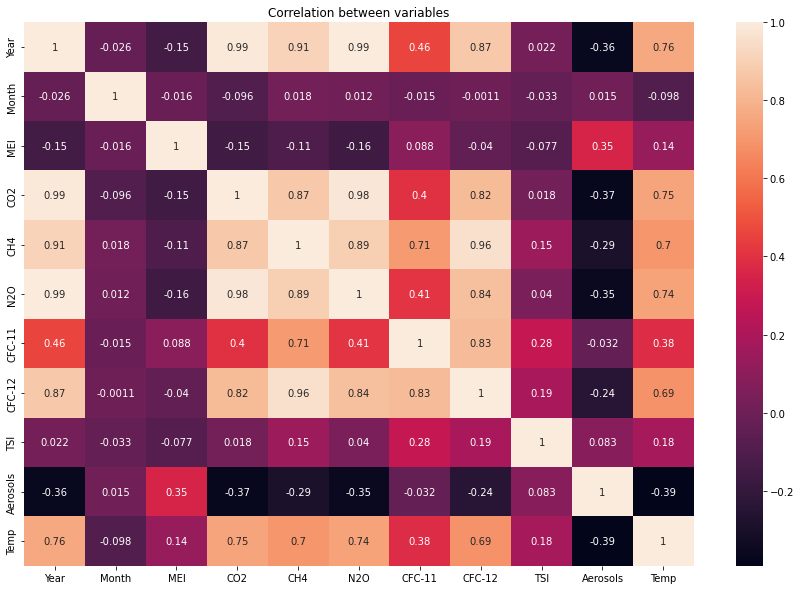

In [19]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
g=sns.heatmap(corr,ax=ax,annot=True)
ax.set_title('Correlation between variables')

# DATA  ANALISYS

<AxesSubplot:xlabel='Aerosols', ylabel='Temp'>

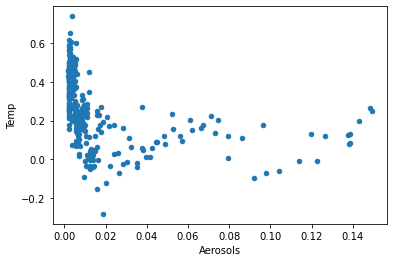

In [28]:
df.plot(kind="scatter",x="Aerosols",y="Temp")

<AxesSubplot:xlabel='Year', ylabel='Temp'>

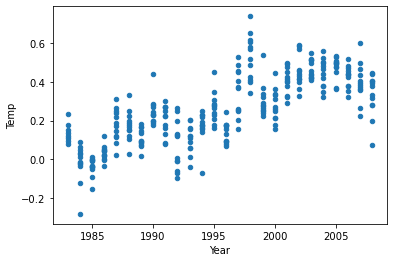

In [29]:
df.plot(kind="scatter",x="Year",y="Temp")

<AxesSubplot:xlabel='Month', ylabel='Temp'>

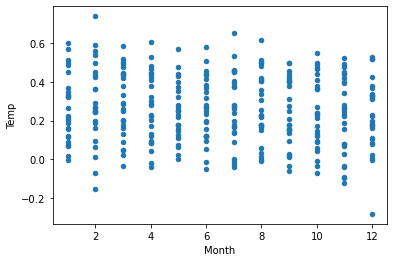

In [30]:
df.plot(kind="scatter",x="Month",y="Temp")

<AxesSubplot:xlabel='MEI', ylabel='Temp'>

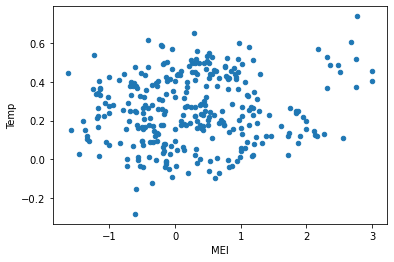

In [31]:
df.plot(kind="scatter",x="MEI",y="Temp")

<AxesSubplot:xlabel='CO2', ylabel='Temp'>

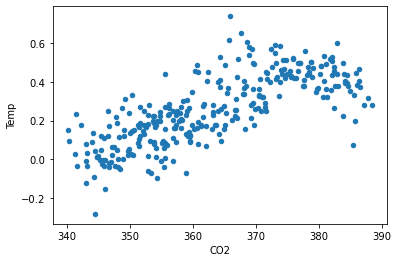

In [32]:
df.plot(kind="scatter",x="CO2",y="Temp")

<AxesSubplot:xlabel='CH4', ylabel='Temp'>

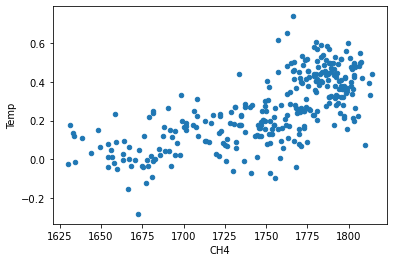

In [33]:
df.plot(kind="scatter",x="CH4",y="Temp")

<AxesSubplot:xlabel='N2O', ylabel='Temp'>

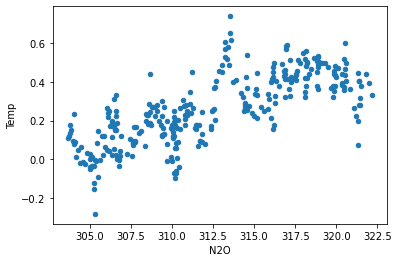

In [34]:
df.plot(kind="scatter",x="N2O",y="Temp")

<AxesSubplot:xlabel='CFC-11', ylabel='Temp'>

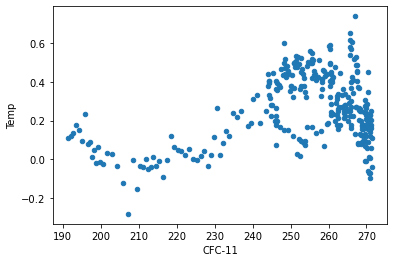

In [35]:
df.plot(kind="scatter",x="CFC-11",y="Temp")

<AxesSubplot:xlabel='CFC-12', ylabel='Temp'>

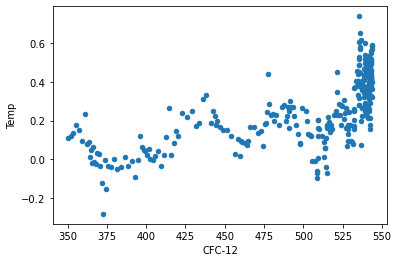

In [36]:
df.plot(kind="scatter",x="CFC-12",y="Temp")

<AxesSubplot:xlabel='TSI', ylabel='Temp'>

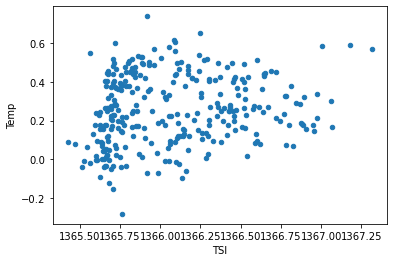

In [37]:
df.plot(kind="scatter",x="TSI",y="Temp")

In [38]:
X=data.drop(['Month'],axis=1)
X=X.drop(['Year'],axis=1)
X=X.drop(['Temp'],axis=1)
y=data['Temp']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [117]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(231, 8)
(77, 8)
(231,)
(77,)


# Modeling

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [119]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
model.coef_

array([ 6.07776845e-02,  6.18951796e-03,  3.91260761e-05, -1.54958741e-02,
       -6.47138053e-03,  3.72058735e-03,  8.16163176e-02, -1.52309575e+00])

In [121]:
y_pred=model.predict(X_test)

In [122]:
mean_squared_error(y_test,y_pred)

0.009882321129515955

In [123]:
r2_score(y_test,y_pred)

0.7227897014556153

In [124]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7461592331848517
0.7227897014556153


In [125]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [130]:
print(model.score(X_train,y_train)*100)
print(model.score(X_test,y_test)*100)

90.3313161354741
73.73664280242677


In [127]:
y_pred=model.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.00936267271196084
0.7373664280242678
